<a href="https://colab.research.google.com/github/hughjafro/DS-Sprint-02-Storytelling-With-Data/blob/master/Chris_Tolbert_LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
-https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

We want to recreate Hans Rosling research data

**Variables --> Visual Encodings**
-Income --> x
-Lifespan --> y
-Region --> color
-Population --> size
-Year --> animation frame (alternative: small multiple (https://en.wikipedia.org/wiki/Small_multiple))
-Country --> annotation

**Qualitative --> Verbal**
-Editorial / contextual explanation --> audio narration (alternative:text)

**Sample dummy data of format**
Year	  Country	         Region	           Income	       Lifespan	    Population
1818	  USA	             Americas	          ###	               ##	                #
1918	  USA	             Americas	         ####	            ###	             ##
2018	  USA	             Americas	        #####	          ###	            ###
1818	  China	            Asia	                  #	                   #	                #
1918	  China            	Asia	                  ##	              ##	            ###
2018	  China	            Asia	                ###	            ###	          #####




In [1]:
# Make sure i have the latest version of seaborn 0.9
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
# Import essentials
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
# Load and look at data
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')


In [5]:
# Look at the shape
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [6]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [7]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [8]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [9]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [10]:
concepts.head().T

,0,1,2,3,4
concept,adults_with_hiv_percent_age_15_49,age_at_1st_marriage_women,aged_15_24_employment_rate_percent,aged_15_24_unemployment_rate_percent,aged_15_64_labour_force_participation_rate_per...
color,NaN,NaN,NaN,NaN,NaN
concept_type,measure,measure,measure,measure,measure
description,The estimated percentage of adults aged 15 to ...,"The mean age, in years, of first marriage for ...","Percentage of total population, age group 15-2...","Percentage of total population, age group 15-2...","For age group 15-64, percentage of all labour ..."
description_long,NaN,NaN,NaN,NaN,NaN
domain,NaN,NaN,NaN,NaN,NaN
drill_up,NaN,NaN,NaN,NaN,NaN
indicator_url,NaN,NaN,NaN,NaN,NaN
name,"Adults with HIV (%, age 15-49)",Age at 1st marriage (women),Aged 15-24 employment rate (%),Aged 15-24 unemployment rate (%),Aged 15-64 labour force participation rate (%)
name_catalog,"Adults with HIV (%, age 15-49)",Age at 1st marriage (women),Aged 15-24,Aged 15-24,Aged 15-64


**MERGE DATA**

In [0]:
# We can look at Pandas Cheatsheets
# https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf OR
#pd.merge?   #help(pd.merge) or pd.merge??#
pd.merge??

In [0]:
df = pd.merge(income, lifespan)

In [13]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [14]:
#diff number of rows on df. Bcs inner: use intersection of keys from both frames
# only keeping the rows where it found the same geophraphy for the same 
# time frame for both dataframes. May be some missing data,
# i.e. have the income but no the lifespan. More in Unit 3

df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [15]:
# What is the 1st row abw - looks like its Aruba
#entities.head()
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [16]:
# Explore diff region info (world_4region americas)?
entities.world_4region.value_counts()


asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [17]:
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [18]:
# Not sure why they dont map directly
#What we want to get out of this are 3 variables
# use the country to join on, the human-readible Name

# If we pass the varibale in to the brackets then it shows me
# how I can use a list like in variables to filter in pandas 
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [19]:
# ISSUE: diff names for keys - the country name is still not what we want, bcs in head it is geo -diff names for keys
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
df = pd.merge(df, population)

In [21]:
# Gives a preview before assigning to df or other variable
pd.merge(df, entities[variables], how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [0]:
# Some redundancy - both geo and country, but don't need since we have the Real Name
df = pd.merge(df, entities[variables], how='inner', left_on='geo', right_on='country')

#drop some columns an rename
df.drop(columns=['geo', 'country'], inplace=True)

# Use the pandas rename function and give it a dict of which columns to rename
df.rename(columns={
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted':'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country', 
    'world_6region': 'region' 
}, inplace=True)

In [23]:
df.shape

(41790, 6)

In [25]:
# If we look at "the goal" table, we are pretty close here
df.head()

,year,income,lifespan,population,country,region
41785,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
41786,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
41787,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
41788,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
41789,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


In [26]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [28]:
# Pop column has sci notation
df.describe(exclude=np.number) #remember (include='all')

,country,region
count,41790,41790
unique,194,6
top,Switzerland,europe_central_asia
freq,219,10991


In [29]:
# Do I want to see unique column entries
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [0]:
usa = df[df.country=='United States']

In [33]:
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [32]:
# bool indexing - return only rows that are true
df[df.country =='United States']

,year,income,lifespan,population,country,region
39381,1800,2127,39.41,6801854,United States,america
39382,1801,2167,39.41,6933517,United States,america
39383,1802,2202,39.41,7067728,United States,america
39384,1803,2166,39.41,7204538,United States,america
39385,1804,2165,39.41,7343995,United States,america
39386,1805,2209,39.41,7486152,United States,america
39387,1806,2251,39.41,7631061,United States,america
39388,1807,2273,39.41,7778775,United States,america
39389,1808,2113,39.41,7929348,United States,america
39390,1809,2217,39.41,8082836,United States,america


In [34]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


In [42]:
# What do we do to get all of the countries for 2018
# today = df[df.year.isin([2018])] - my try and it works, also
now = df[df.year==2018]
print(now.shape)
now.sample(5)

(188, 6)


,year,income,lifespan,population,country,region
6882,2018,57133,83.45,8544034,Switzerland,europe_central_asia
17435,2018,6890,69.10,1354051854,India,south_asia
20282,2018,3832,69.35,16245729,Cambodia,east_asia_pacific
30403,2018,32564,79.08,3659007,Puerto Rico,america
4645,2018,17159,73.76,9452113,Belarus,europe_central_asia


In [0]:
# now let's plot using the relational plot of seaborn
# look at sns.relplot??
sns.relplot?

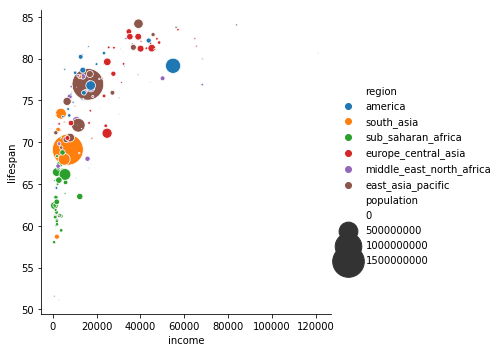

In [68]:
# what command would we type if we wanted to use the variables
# of income, lifespan, region and population. NOt year bcs we are doing a static image

# data=now tells it which dataframe to use
# played with sizes

sns.relplot(x='income', y='lifespan', size='population',sizes=(0,1000), hue='region', data = now)

**Analyze outliers**

In [71]:
# How do we figure out which countries have income > 80,000
big_income = df[df.income>=80000]
print(big_income.shape)
big_income.head()

(171, 6)


,year,income,lifespan,population,country,region
1097,1974,145396,67.84,471364,United Arab Emirates,middle_east_north_africa
1098,1975,163411,68.35,554324,United Arab Emirates,middle_east_north_africa
1099,1976,160718,68.86,646943,United Arab Emirates,middle_east_north_africa
1100,1977,162844,69.37,748117,United Arab Emirates,middle_east_north_africa
1101,1978,139160,69.79,852262,United Arab Emirates,middle_east_north_africa


In [73]:
concepts.value_count()

AttributeError: ignored